In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib widget

In [8]:
podaci = pd.read_csv("mouse.csv", header=None)

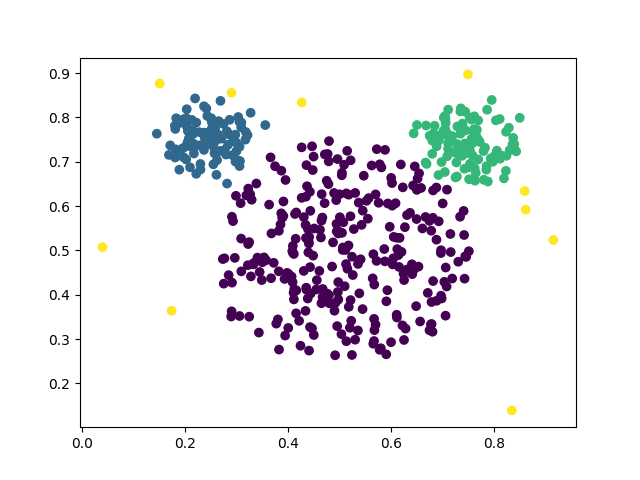

In [9]:
plt.figure()
plt.scatter(podaci[0], podaci[1], c=podaci[2])
plt.show()

In [48]:
def kmeans(podaci, k, epsilon=0.0001, maks_koraka=1000):
    centri = np.random.rand(k, len(podaci[0]))
    treba_azurirati = True
    koraci = 0
    
    while treba_azurirati and koraci < maks_koraka:
        grupe = [list() for i in range(k)]

        for p in podaci:
            udaljenosti = []
            for c in centri:
                udaljenosti.append(np.sum((p-c)**2))
            grupe[np.argmin(udaljenosti)].append(p)

        novi_centri = np.zeros(centri.shape)
        for i, g in enumerate(grupe):
            novi_centri[i] = np.average(np.array(g), 0)

        treba_azurirati = np.any(np.sum((centri - novi_centri)**2) > epsilon)
        centri = novi_centri
        koraci += 1
    return centri, grupe

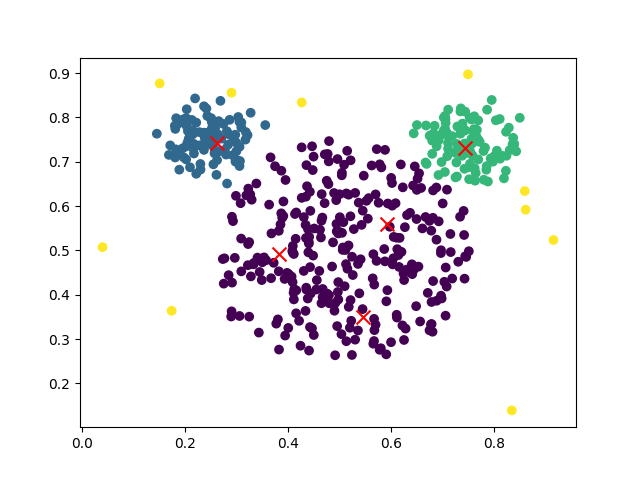

In [77]:
centri, grupe = kmeans(podaci[[0, 1]].to_numpy(), 5)
print()
plt.figure()
plt.scatter(podaci[0], podaci[1], c=podaci[2])

# g1 = np.array(grupe[0])
# g2 = np.array(grupe[1])
# g3 = np.array(grupe[2])

# plt.scatter(g1[:, 0], g1[:, 1], c="g")
# plt.scatter(g2[:, 0], g2[:, 1], c="r")
# plt.scatter(g3[:, 0], g3[:, 1], c="b")

plt.scatter(centri[:, 0], centri[:, 1], c="r", marker="x", s=100)



plt.show()

In [79]:
from struct import *
import numpy as np

def ucitaj_mnist(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_slika = unpack(">I", fp.read(4))[0]
        broj_redova = unpack(">I", fp.read(4))[0]
        broj_kolona = unpack(">I", fp.read(4))[0]
        
        slike = np.frombuffer(fp.read(broj_slika*broj_redova*broj_kolona), dtype=np.uint8).reshape((broj_slika, broj_redova, broj_kolona))
        return slike

def ucitaj_mnist_labele(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_labela = unpack(">I", fp.read(4))[0]
        labele = np.frombuffer(fp.read(broj_labela), dtype=np.uint8)
        return labele
    
slike_trening = ucitaj_mnist("train-images.idx3-ubyte")
labele_trening = ucitaj_mnist_labele("train-labels.idx1-ubyte")

slike_test = ucitaj_mnist("train-images.idx3-ubyte")
labele_test = ucitaj_mnist_labele("train-labels.idx1-ubyte")

In [83]:
slike = slike_trening.reshape(slike_trening.shape[0], slike_trening.shape[1]*slike_trening.shape[2])/255

In [84]:
centri, grupe = kmeans(slike, 10)

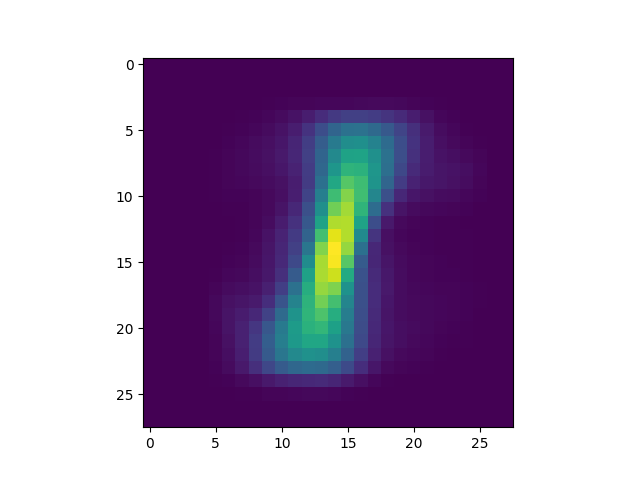

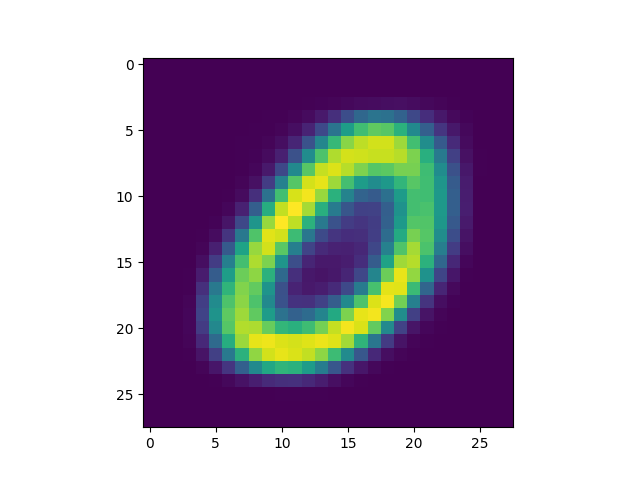

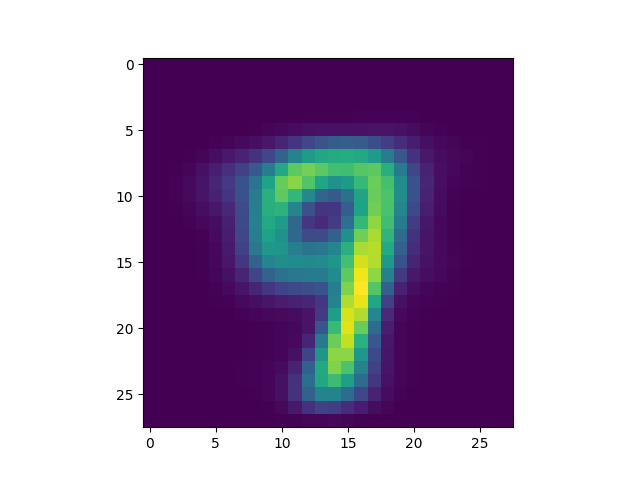

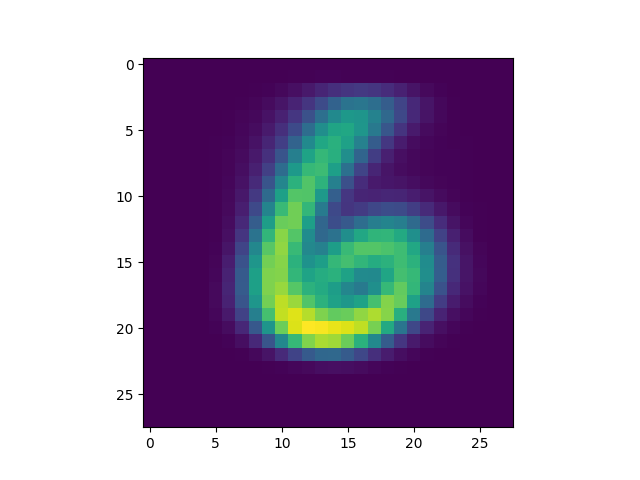

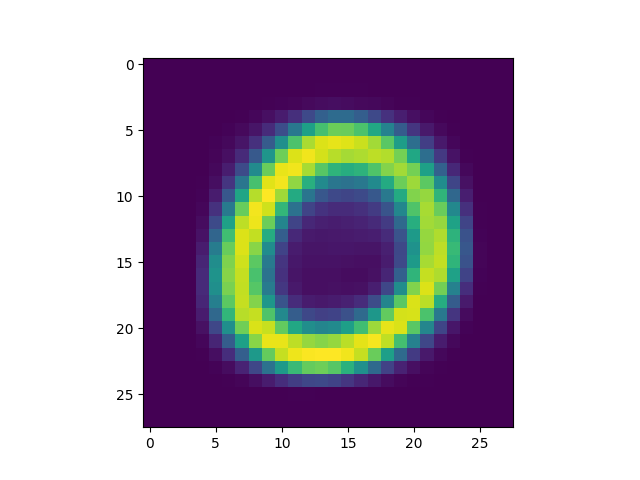

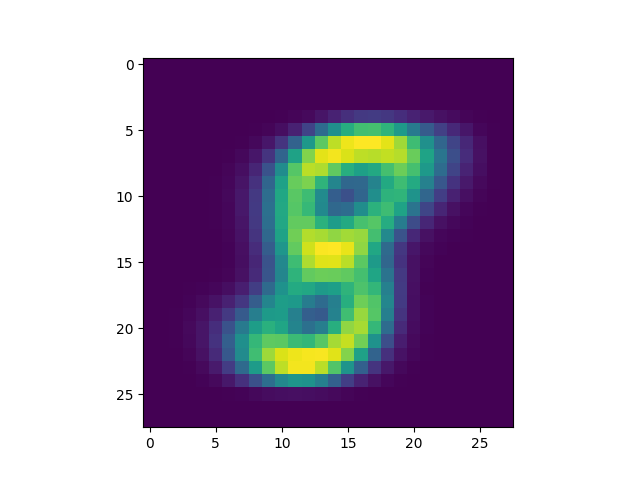

In [90]:
for i in range(10):
    plt.figure()
    plt.imshow(centri[i].reshape(28, 28))
    plt.show()
# centri

In [111]:
plt.figure()
plt.imshow(grupe[8][20].reshape(28, 28))
plt.show()